In [1]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

In [2]:
env = GridworldEnv()

In [48]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    changed = True
    
    while changed:
        changed = False
        
        for s in range(env.nS):
            exp = 0
            for a in policy[s].nonzero()[0]:
                for prob, next_state, reward, _ in env.P[s][a]:
                    exp += prob * policy[s][a] * (reward + discount_factor * V[next_state])
            
            if abs(exp - V[s]) >= theta:
                changed = True
                
            V[s] = exp
            
    return np.array(V)

In [42]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(random_policy, env)

In [43]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

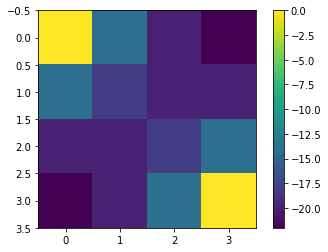

In [47]:
import matplotlib.pyplot as plt

plt.imshow(v.reshape((4, 4)))
plt.colorbar()
plt.show()